Image classification model build using FastAI(based on PyTorch). 
Explained in Lesson 1:Deep Learning 2019 by Jeremy Howard.

https://www.youtube.com/watch?reload=9&v=XfoYk_Z5AkI

Dataset used: https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

Define dataset

In [3]:
#help(untar_data)
pets = "https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet"

In [4]:
path = untar_data(pets); path

PosixPath('/tmp/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/tmp/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images')]

In [6]:
path_anno = path/'annotations'
path_img = path/'images'

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/beagle_14.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/basset_hound_110.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/Sphynx_164.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/chihuahua_149.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/havanese_20.jpg')]

Regular expression to extract the label of .jpg

In [8]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [9]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
beagle,basset_hound,Sphynx,pug,chihuahua
Path: /tmp/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,Maine_Coon,pug,miniature_pinscher,pug
Path: /tmp/.fastai/data/oxford-iiit-pet/images;

Test: None

In [10]:
help(data.show_batch)

Help on method show_batch in module fastai.basic_data:

show_batch(rows:int=5, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>, reverse:bool=False, **kwargs) -> None method of fastai.vision.data.ImageDataBunch instance
    Show a batch of data in `ds_type` on a few `rows`.



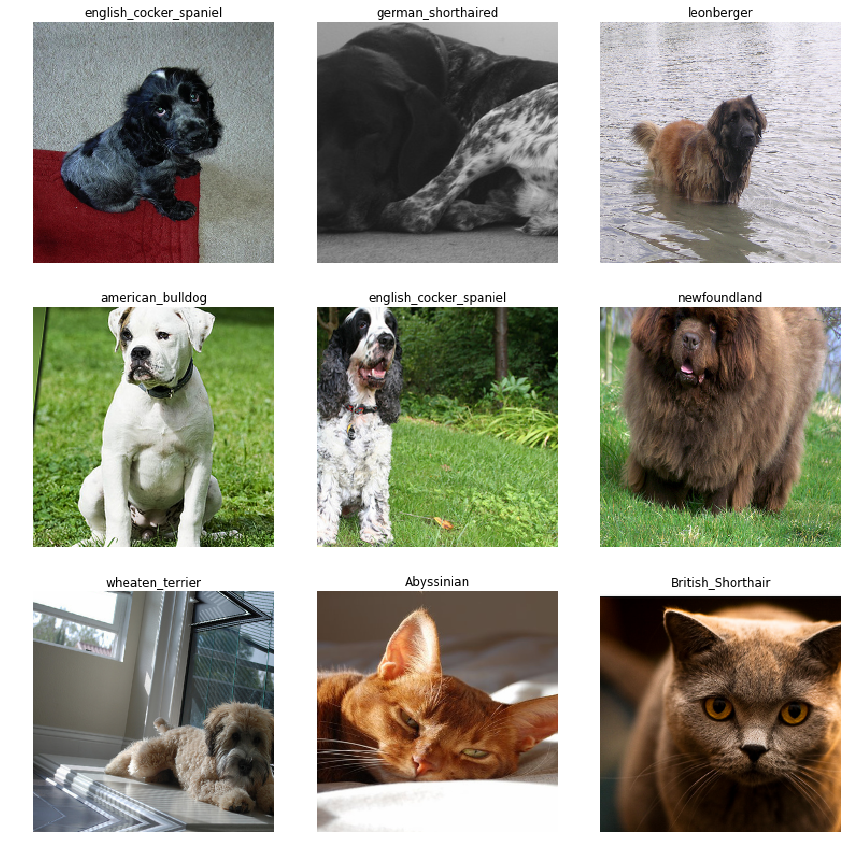

In [11]:
data.show_batch(rows=3)

In [12]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [13]:
len(data.classes)

37

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 68085987.97it/s]


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.407792,0.355643,0.110284,01:33
1,0.579614,0.273022,0.093369,01:30
2,0.345290,0.225465,0.071719,01:27
3,0.245821,0.222029,0.071042,01:28


In [16]:
learn.save('stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

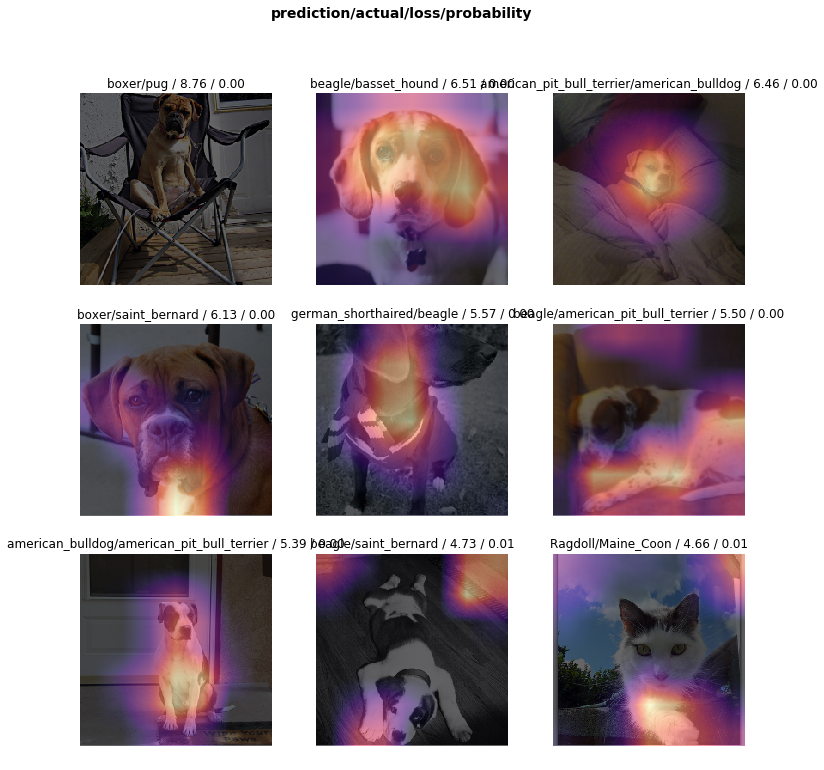

In [18]:
interp.plot_top_losses(9)

In [19]:
doc(interp.plot_top_losses)

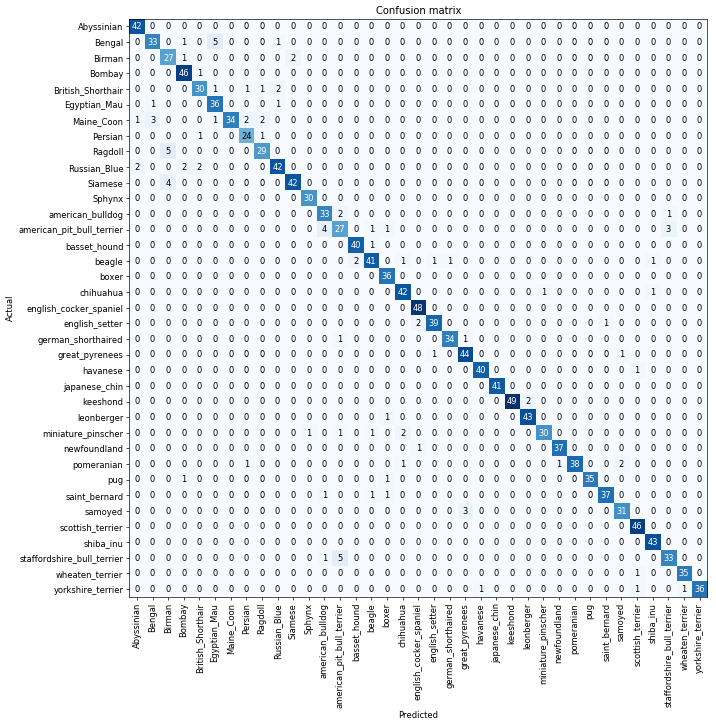

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi =60)

In [21]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 5),
 ('Ragdoll', 'Birman', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Siamese', 'Birman', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Maine_Coon', 'Bengal', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('keeshond', 'leonberger', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('pomeranian', 'samoyed', 2)]

In [22]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.516480,0.354134,0.115697,01:30


In [24]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
beagle,basset_hound,Sphynx,pug,chihuahua
Path: /tmp/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,Maine_Coon,pug,miniature_pinscher,pug
Path: /tmp/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


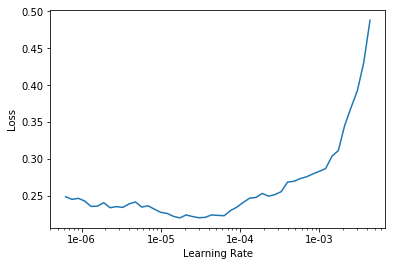

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.235005,0.219177,0.069689,01:29
1,0.210396,0.212042,0.063599,01:30
